In [1]:
# Imports
# ! pip install --user pandas==1.5.3
# ! pip install matplotlib 
# ! pip install seaborn
# ! pip install scikit-learn
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [48]:
# if using colab uncoment the two lines

# Specify the file path
# file_path = '/content/EnergyconsumptionPrediction/clean_data.csv'

file_path = 'datasets/clean_data.csv'

# Read the CSV file into a DataFrame
dataset = pd.read_csv(file_path)

dataset = dataset.set_index("DateTime")
dataset.index = pd.to_datetime(dataset.index)

# Print the DataFrame or perform any desired operations
display(dataset)

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2016-01-04 00:00:00,11721.0,1,2016,2016-01-04,00:00:00,1,Monday
2016-01-04 01:00:00,11626.0,1,2016,2016-01-04,01:00:00,1,Monday
2016-01-04 02:00:00,11253.0,1,2016,2016-01-04,02:00:00,1,Monday
2016-01-04 03:00:00,10925.0,1,2016,2016-01-04,03:00:00,1,Monday
2016-01-04 04:00:00,10684.0,1,2016,2016-01-04,04:00:00,1,Monday
...,...,...,...,...,...,...,...
2021-12-26 19:00:00,12550.0,12,2021,2021-12-26,19:00:00,51,Sunday
2021-12-26 20:00:00,12622.0,12,2021,2021-12-26,20:00:00,51,Sunday
2021-12-26 21:00:00,12574.0,12,2021,2021-12-26,21:00:00,51,Sunday


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52774 entries, 2016-01-04 00:00:00 to 2021-12-26 23:00:00
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  52774 non-null  float64
 1   Month        52774 non-null  int64  
 2   Year         52774 non-null  int64  
 3   Date         52774 non-null  object 
 4   Time         52774 non-null  object 
 5   Week         52774 non-null  int64  
 6   Day          52774 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 3.2+ MB


# GRU Model

## Train, Validation and Test Dataset

In [4]:
dataset

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2016-01-04 00:00:00,11721.0,1,2016,2016-01-04,00:00:00,1,Monday
2016-01-04 01:00:00,11626.0,1,2016,2016-01-04,01:00:00,1,Monday
2016-01-04 02:00:00,11253.0,1,2016,2016-01-04,02:00:00,1,Monday
2016-01-04 03:00:00,10925.0,1,2016,2016-01-04,03:00:00,1,Monday
2016-01-04 04:00:00,10684.0,1,2016,2016-01-04,04:00:00,1,Monday
...,...,...,...,...,...,...,...
2021-12-26 19:00:00,12550.0,12,2021,2021-12-26,19:00:00,51,Sunday
2021-12-26 20:00:00,12622.0,12,2021,2021-12-26,20:00:00,51,Sunday
2021-12-26 21:00:00,12574.0,12,2021,2021-12-26,21:00:00,51,Sunday


In [6]:
# Downsampling involves decreasing the time-frequency of the data
# Downsapling the time-frequency from hours to days 
newDataSet = dataset.resample("D").mean()
dataset.dtypes

C:\Users\salah\AppData\Local\Temp\ipykernel_31836\4012609752.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  newDataSet = dataset.resample("D").mean()


Consumption    float64
Month            int64
Year             int64
Date            object
Time            object
Week             int64
Day             object
dtype: object

In [7]:
# We have 2193 row
# 2193 - 3 - 6 = 2184 row after omit first two rows and last six ones.  
# 2184 / 7 = 312 week  
# 312 * 80 %  250 week for train (1750 day)  
# 312 - 250 = 62 week for test (434 day)
print("Old Dataset: ", dataset.shape)
print("New Dataset: ", newDataSet.shape)

Old Dataset:  (52774, 7)
New Dataset:  (2184, 4)


In [8]:
# Saving data in CSV new file
# newDataSet.to_csv("newDataSet.csv")
# from google.colab import files
# files.download("newDataSet.csv")

In [9]:
newDataSet.head()

,Consumption,Month,Year,Week
DateTime,,,,
2016-01-04,12300.625000,1.0,2016.0,1.0
2016-01-05,12945.375000,1.0,2016.0,1.0
2016-01-06,13192.750000,1.0,2016.0,1.0
2016-01-07,14243.541667,1.0,2016.0,1.0
2016-01-08,14121.666667,1.0,2016.0,1.0


In [10]:
y = newDataSet["Consumption"]
print(y[0])
y.shape

12300.625


(2184,)

In [11]:
# Normalize data before model fitting
# it will boost the performance( in neural networks) + transform
# scale of the output and input inthe range 0-1 to match the scale of the layer of LSTM
scaler = MinMaxScaler(feature_range = (0,1)) 
# reshape: convert the univariate 1D array into 2D
y = scaler.fit_transform(np.array(y).reshape(-1,1))
print("Normalizing data before model fitting")
print(y[:10])


Normalizing data before model fitting
[[0.75916744]
 [0.83908687]
 [0.86975003]
 [1.        ]
 [0.98489309]
 [0.82500258]
 [0.78623593]
 [0.83189672]
 [0.80348621]
 [0.8313604 ]]


In [12]:
training_size = int(len(y)*0.80)
test_size = len(y)- training_size
val_size = int(training_size*0.20)
train_data , test_data , val_data = y[0:training_size-val_size,:] , y[training_size:len(y),:1], y[len(y)-test_size-val_size:len(y)-test_size,:1]


In [13]:
# building input variable
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [] , []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return np.array(dataX), np.array(dataY)


In [14]:
time_step = 100 
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
X_val, yval = create_dataset(val_data, time_step)


In [15]:
# reshape train and input-output pairs
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1],1)

print("X_train shape: ", X_train.shape)
print("X_test shape: ",X_test.shape)
print("X_val shape: ",X_val.shape)


X_train shape:  (1297, 100, 1)
X_test shape:  (336, 100, 1)
X_val shape:  (248, 100, 1)


## Model Structure


In [16]:
# ! pip install tensorflow

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout

model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(GRU(units = 50, return_sequences = True, input_shape = (time_step, 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(GRU(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# # Adding a third LSTM layer and some Dropout regularisation
model.add(GRU(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(GRU(units = 50))
# model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 100, 50)           7950      
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 gru_1 (GRU)                 (None, 100, 50)           15300     
                                                                 
 gru_2 (GRU)                 (None, 100, 50)           15300     
                                                                 
 gru_3 (GRU)                 (None, 50)                15300     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 53,901
Trainable params: 53,901
Non-traina

## Model Training

In [18]:
history = model.fit(X_train, y_train, validation_data = (X_val,yval), verbose = 1,epochs = 180 ,batch_size = 20)

Epoch 1/240
65/65 [==============================] - 53s 402ms/step - loss: 0.0181 - val_loss: 0.0035
Epoch 2/240
65/65 [==============================] - 19s 294ms/step - loss: 0.0054 - val_loss: 0.0031
Epoch 3/240
65/65 [==============================] - 19s 299ms/step - loss: 0.0047 - val_loss: 0.0030
Epoch 4/240
65/65 [==============================] - 19s 298ms/step - loss: 0.0046 - val_loss: 0.0032
Epoch 5/240
65/65 [==============================] - 19s 292ms/step - loss: 0.0044 - val_loss: 0.0028
Epoch 6/240
65/65 [==============================] - 19s 299ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 7/240
65/65 [==============================] - 18s 282ms/step - loss: 0.0039 - val_loss: 0.0025
Epoch 8/240
65/65 [==============================] - 18s 274ms/step - loss: 0.0035 - val_loss: 0.0027
Epoch 9/240
65/65 [==============================] - 18s 281ms/step - loss: 0.0037 - val_loss: 0.0020
Epoch 10/240
65/65 [==============================] - 18s 283ms/step - loss: 0.003

In [19]:
model.save('models/GRU-4Layers.h5')

## Model Evaluating

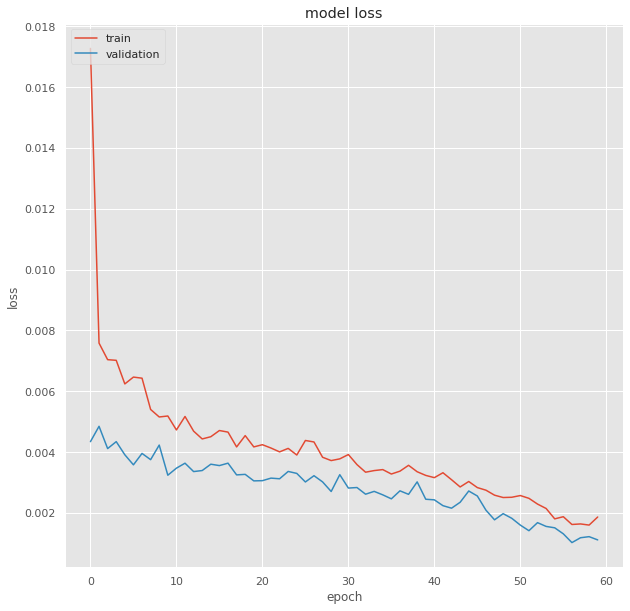

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss']) # tb
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


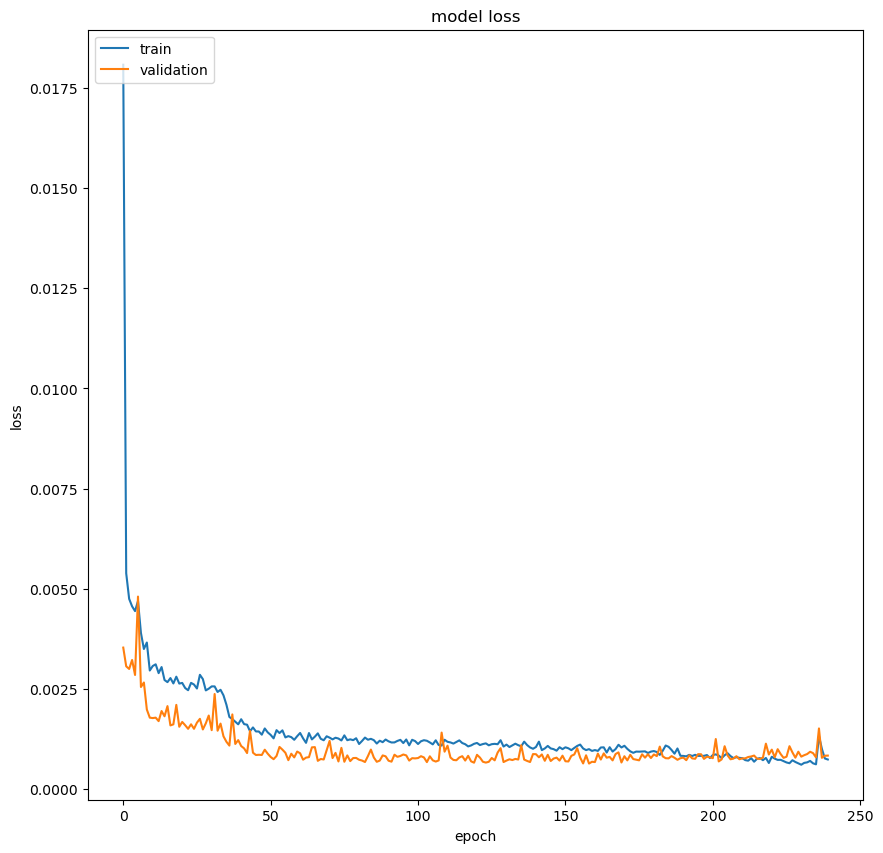

In [20]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss']) # tb
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [25]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [26]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
val_predict=model.predict(X_val)


8/8 [==============================] - 1s 81ms/step


In [27]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
val_predict=scaler.inverse_transform(val_predict)

In [28]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

9567.613506193971

In [29]:
print(train_predict.shape)
print(test_predict.shape)
print(val_predict.shape)
print(train_predict[0])
print(y_train.shape)


(1297, 1)
(336, 1)
(248, 1)
[9416.275]
(1297,)


# Conclusion

In [30]:
# Predicting consumption using training data
train_predictions = model.predict(X_train)
train_predictions =scaler.inverse_transform(train_predictions)

y_train = y_train.reshape(y_train.shape[0], 1)
actual = scaler.inverse_transform(y_train)
train_results = pd.DataFrame()

train_results["Train Predictions"] = train_predictions.tolist()
train_results["Actuals"] = actual.tolist()

train_results

41/41 [==============================] - 4s 87ms/step


,Train Predictions,Actuals
0,[9416.275390625],[9406.708333333334]
1,[9483.228515625],[9614.791666666666]
2,[9672.9208984375],[9894.708333333334]
3,[9246.833984375],[8933.708333333334]
4,[8745.0166015625],[8557.208333333334]
...,...,...
1292,[8815.865234375],[9259.666666666666]
1293,[10033.8447265625],[10248.5]
1294,[10315.4404296875],[10360.333333333334]
1295,[10326.4208984375],[10489.833333333334]


#### Prediction of training data

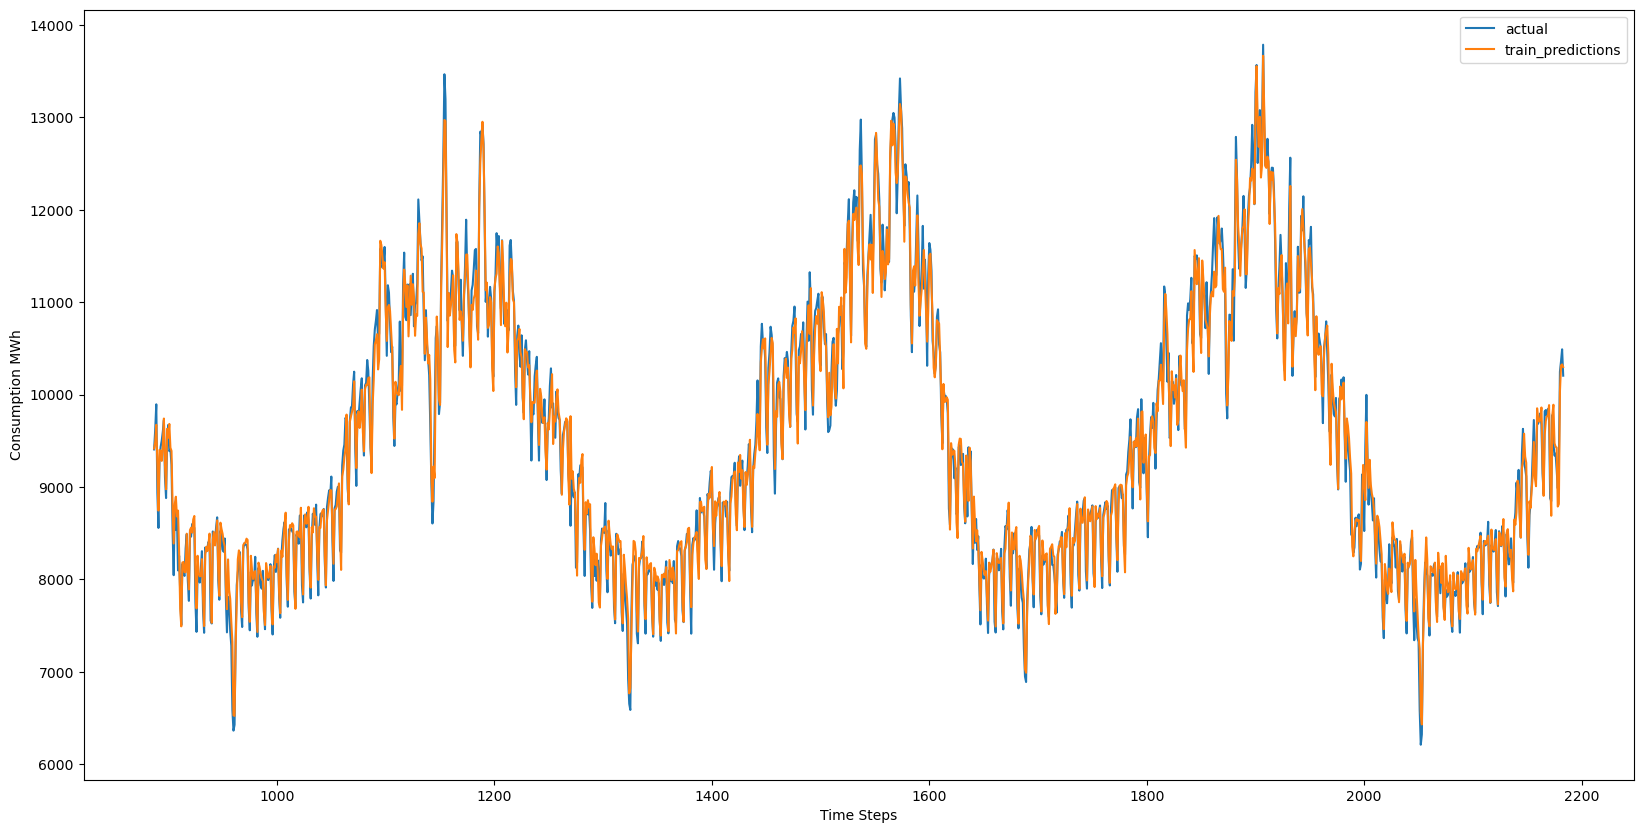

In [31]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y )
ActualPlot[:, :] = np.nan
ActualPlot[887:, :] = actual.tolist()
plt.plot(ActualPlot)

TrainPredictionsPlot = np.empty_like(y )
TrainPredictionsPlot[:, :] = np.nan
TrainPredictionsPlot[887:, :] = train_predictions.tolist()
plt.plot(TrainPredictionsPlot)

plt.legend(['actual','train_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')
plt.show()

#### Prediction of validation data

In [32]:
# Predicting consumption using validation data
val_predictions = model.predict(X_val)
val_predictions =scaler.inverse_transform(val_predictions)

yval = yval.reshape(yval.shape[0], 1)
actual_val = scaler.inverse_transform(yval)

val_results = pd.DataFrame()
val_results["Val Predictions"] = val_predictions.tolist()
val_results["Actuals_val"] = actual_val.tolist()

val_results


8/8 [==============================] - 1s 107ms/step


,Val Predictions,Actuals_val
0,[9235.1376953125],[8931.875]
1,[8947.3408203125],[9112.916666666666]
2,[8937.94140625],[10019.416666666666]
3,[10007.7470703125],[10390.375]
4,[10371.2548828125],[10802.916666666666]
...,...,...
243,[8094.1962890625],[8020.541666666667]
244,[7826.47021484375],[7921.75]
245,[8627.3720703125],[8705.041666666666]
246,[8662.59765625],[8824.708333333334]


#### Prediction of Test data

Text(0, 0.5, 'Consumption MWh')

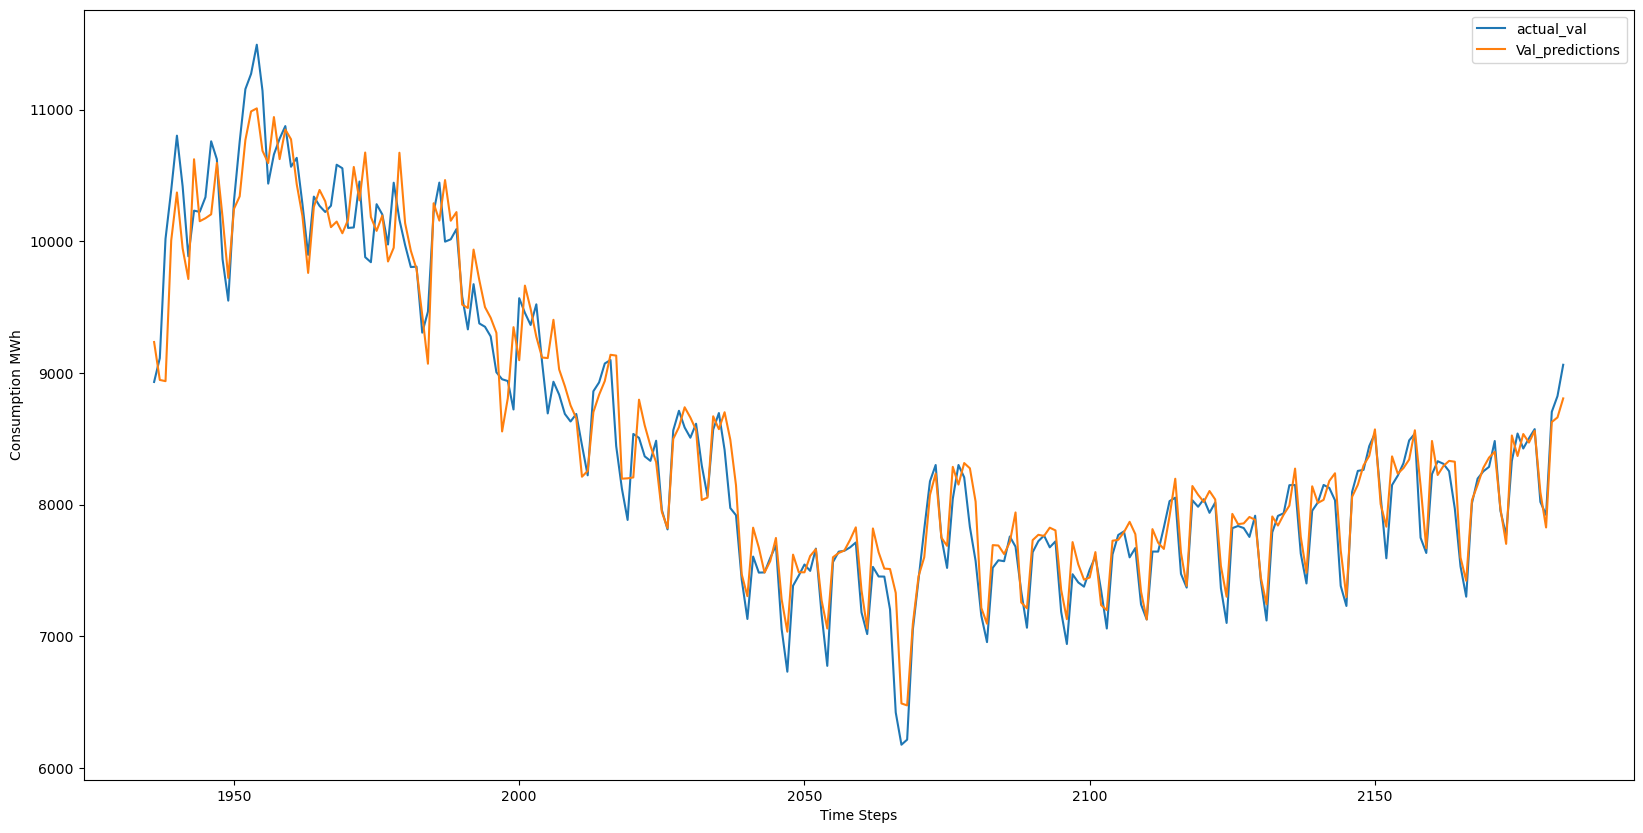

In [33]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[1936:, :] = actual_val.tolist()
plt.plot(ActualPlot)

# Validation Prediction
ValPredictionsPlot = np.empty_like(y)
ValPredictionsPlot[:, :] = np.nan
ValPredictionsPlot[1936:, :] = val_predictions.tolist()
plt.plot(ValPredictionsPlot)

plt.legend(['actual_val','Val_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')


In [34]:
# Predicting consumption using test data
test_predictions = model.predict(X_test)
test_predictions =scaler.inverse_transform(test_predictions)

ytest = ytest.reshape(ytest.shape[0], 1)
actual_test = scaler.inverse_transform(ytest)

test_results = pd.DataFrame()
test_results["test Predictions"] = test_predictions.tolist()
test_results["Actuals_test"] = actual_test.tolist()

test_results

11/11 [==============================] - 1s 98ms/step


,test Predictions,Actuals_test
0,[10714.4921875],[10032.541666666666]
1,[10897.7490234375],[10732.125]
2,[10734.24609375],[10733.583333333334]
3,[10719.3984375],[10971.875]
4,[10835.9091796875],[11227.791666666666]
...,...,...
331,[11899.5634765625],[12540.25]
332,[11694.705078125],[12635.958333333334]
333,[11937.88671875],[11684.333333333334]
334,[11540.083984375],[11384.166666666666]


Text(0, 0.5, 'Consumption MWh')

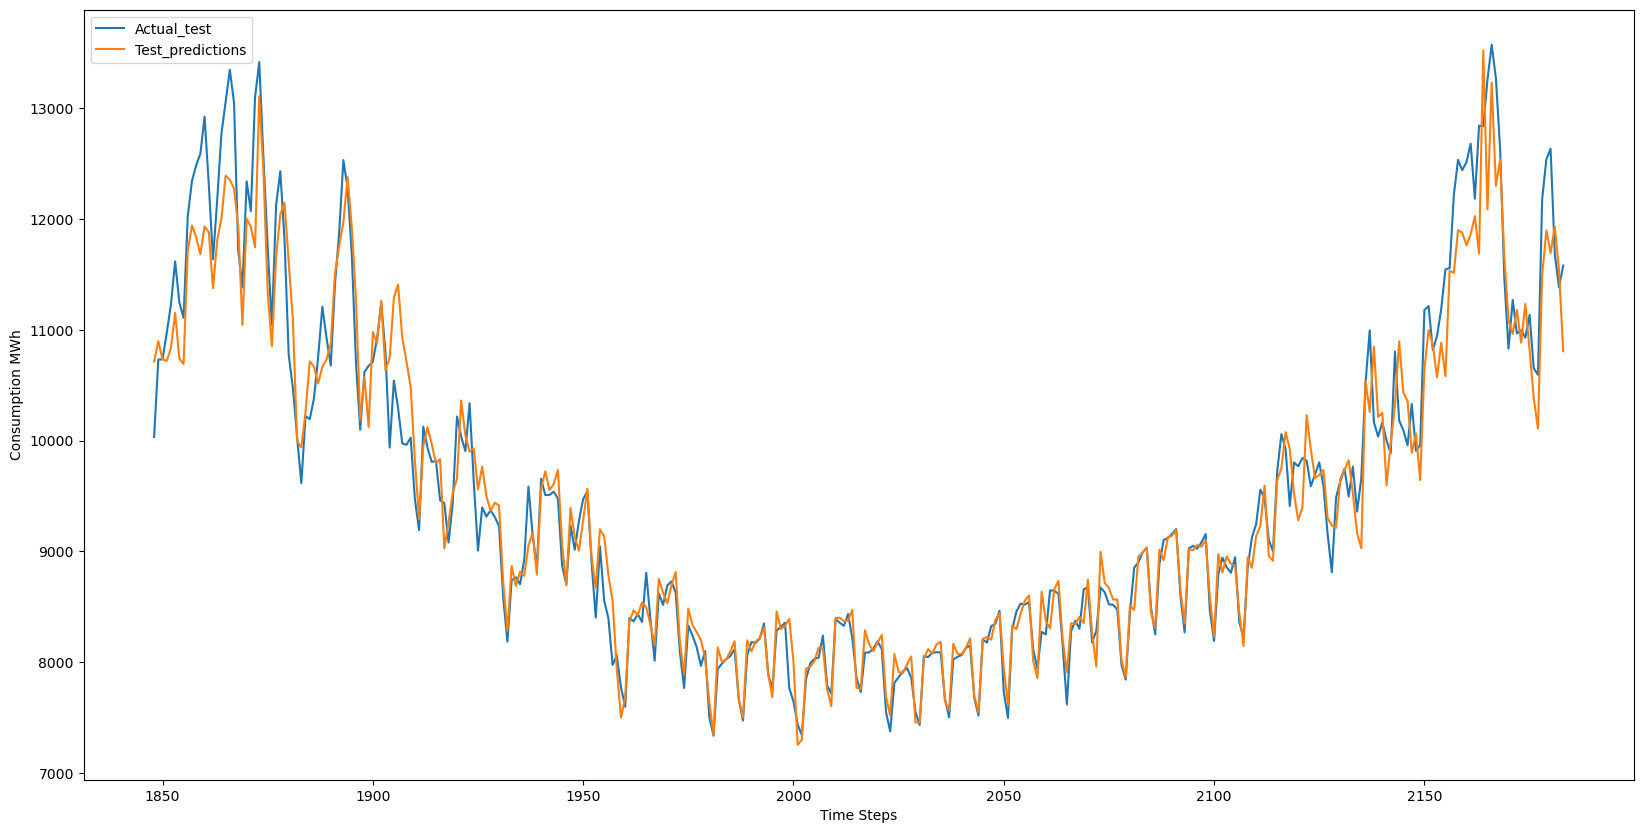

In [35]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[1848:, :] = actual_test.tolist()
plt.plot(ActualPlot)

# Test Prediction
TestPredictionsPlot = np.empty_like(y)
TestPredictionsPlot[:, :] = np.nan
TestPredictionsPlot[1848:, :] = test_predictions.tolist()
plt.plot(TestPredictionsPlot)

plt.legend(['Actual_test','Test_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')

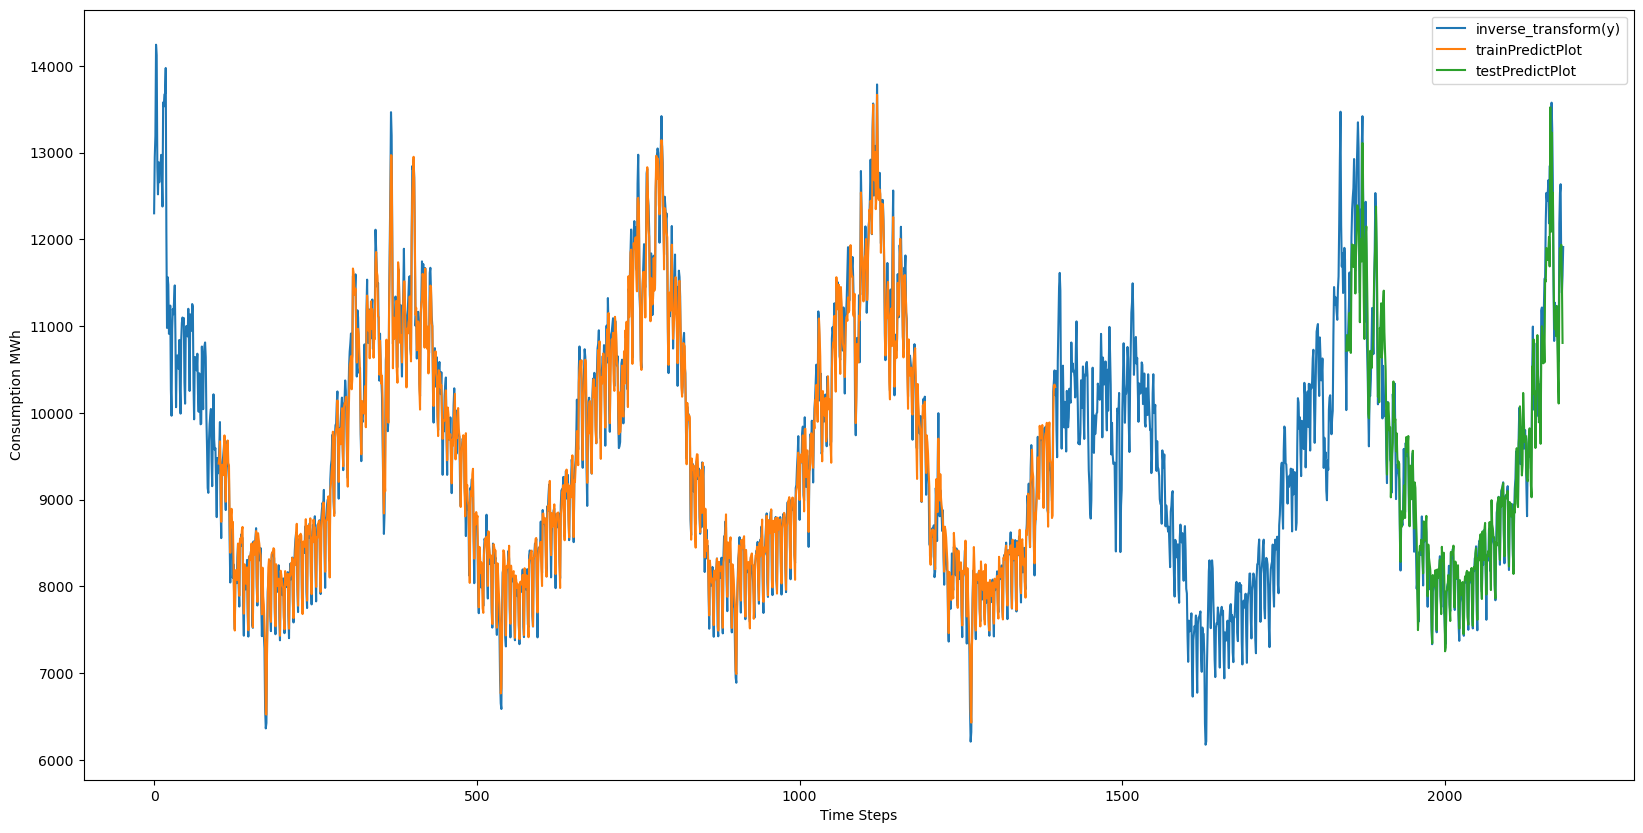

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100 #*****************************************>>>>>100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = np.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(y)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1+349:len(y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['inverse_transform(y)','trainPredictPlot','testPredictPlot'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')
plt.show()

# Future forecasting

In [37]:
print(len(test_data))
print(test_data[0])
print(len(train_data))
x_input=test_data[337:].reshape(1,-1)
print(x_input.shape)
# print(x_input[0])
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
# print(temp_input)

437
[0.40285095]
1398
(1, 100)


In [38]:

# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
test = ""
while(i<30):
    
    if(len(temp_input)>100):
        test = "if"
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        test="else"
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

    
print(test)
print(len(lst_output))

1 day input [0.25709121 0.33563165 0.36255552 0.36498812 0.36948662 0.37489412
 0.30034604 0.25916744 0.35327446 0.35606342 0.3529749  0.36009193
 0.36937816 0.28358124 0.249561   0.32426919 0.3429811  0.33217643
 0.32601487 0.34354922 0.27053507 0.25411631 0.33202665 0.36575767
 0.38037909 0.41900114 0.40965809 0.36264332 0.34998967 0.43912819
 0.48126743 0.46479186 0.40083153 0.44962814 0.44524842 0.45453466
 0.45160624 0.42284888 0.4359467  0.44960748 0.42327755 0.3690941
 0.3264797  0.41017457 0.42818407 0.44249561 0.41147609 0.44483008
 0.39457184 0.43183555 0.53842578 0.59736597 0.49454602 0.47844231
 0.49448921 0.47407293 0.45992666 0.57367524 0.49652928 0.4854922
 0.46876872 0.51486933 0.46267431 0.46884619 0.620282   0.62459457
 0.57526598 0.59118893 0.62118583 0.6655046  0.66726578 0.74881727
 0.7883793  0.77671212 0.78571429 0.80647144 0.74484041 0.82660366
 0.82588059 0.87828737 0.91723995 0.87967669 0.80140998 0.65632683
 0.57681025 0.63147402 0.59401921 0.59759839 0.58928

2184
[[12008.09009666]
 [12029.26863442]
 [11866.5829579 ]
 [11626.807654  ]
 [11318.31883127]
 [11162.45752657]
 [11587.20494727]
 [11731.21929253]
 [11651.01657445]
 [11329.6806025 ]
 [10943.0192546 ]
 [10242.14011232]
 [ 9751.69873613]
 [10139.87046676]
 [ 9817.99520979]
 [ 9725.10258387]
 [ 9805.9888451 ]
 [ 9952.18581604]
 [ 9303.77913016]
 [ 8939.19697168]
 [ 9733.9619572 ]
 [ 9852.54214952]
 [ 9886.23628321]
 [ 9937.46379184]
 [10103.1627805 ]
 [ 9640.1694009 ]
 [ 9447.5619411 ]
 [10146.38973261]
 [10120.01645918]
 [10079.45611882]]


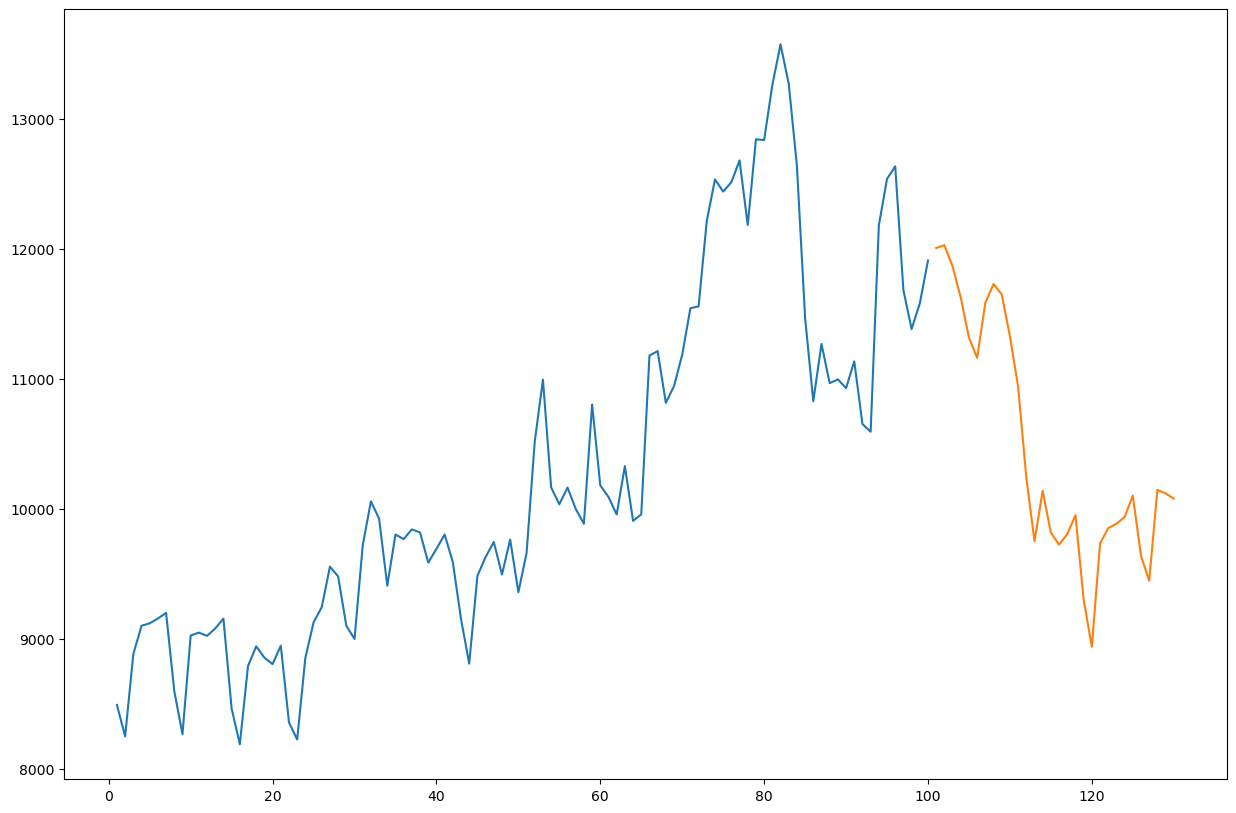

In [47]:
print(len(y))
day_new=np.arange(1,101)
day_pred=np.arange(101, 131 )
plt.figure(figsize = (15,10))
plt.plot(day_new,scaler.inverse_transform(y[2084:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
print(scaler.inverse_transform(lst_output))

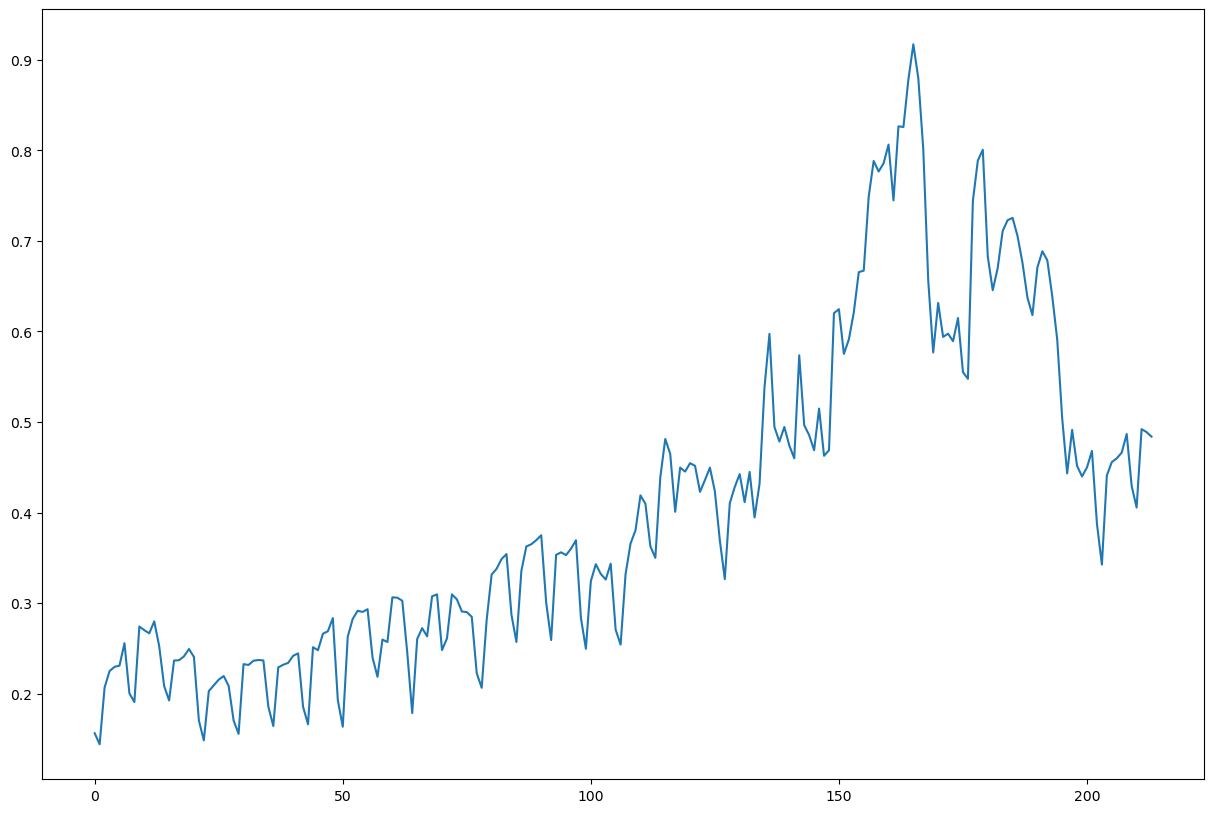